# Imports

In [180]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import geopandas as gpd

import seaborn
#import pandas as pd
#import geopandas as gpd
import pysal
#import numpy as np
import mapclassify
import matplotlib.pyplot as plt

In [181]:
import warnings
warnings.filterwarnings('ignore')

# Drawing Settings for matplotlib

In [21]:
#import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = (15, 10) #this increases the inline figure size to 15 tall x 10 wide

# Load London Bourogh Profiles, for map

In [22]:
profiles = pd.read_csv('lb_profiles.csv')

In [23]:
profiles.iloc[0:5]

,Code,NewCode,NAME,PopDens,AveAge,BornAbroad,Unemp,Disabled,Degrees,MedInc,CrimeRate,HousePrice,GreenSpace,CarsHH,NonEng
0,E09000001,E09000001,City of London,30.3,43.2,NaN,NaN,NaN,NaN,63620,NaN,799999,4.8,0.4,NaN
1,E09000002,E09000002,Barking and Dagenham,57.9,32.9,37.8,11.0,17.2,32.2,29420,83.4,243500,33.6,0.8,41.7
2,E09000003,E09000003,Barnet,44.9,37.3,35.2,8.5,14.9,49.0,40530,62.7,445000,41.3,1.1,46.0
3,E09000004,E09000004,Bexley,40.3,39.0,16.1,7.6,15.9,33.5,36990,51.8,275000,31.7,1.2,32.6
4,E09000005,E09000005,Brent,76.8,35.6,53.9,7.5,17.7,45.1,32140,78.8,407250,21.9,0.8,37.6


In [24]:
schools = pd.read_csv('all_schools_xy.csv')

In [25]:
schools.iloc[0:5]

,FID,OBJECTID,URN,SCHOOL_NAM,TYPE,PHASE,ADDRESS,TOWN,POSTCODE,STATUS,...,EASTING,NORTHING,WARD_NAME,LA_NAME,WEBLINK,AGE,map_icon,Primary,POINT_X,POINT_Y
0,0,1.000000000000000,100332,Langford Primary School,Community School,Primary,Gilstead Road,London,SW6 2LG,"Open, but proposed to close",...,525887,176415,Sands End,Hammersmith and Fulham,www.langford.lbhf.sch.uk,3 - 11,STATE-FUNDED,1,-0.188834,51.472703
1,1,2.000000000000000,101596,Worsley Bridge Primary School,Community School,Primary,Brackley Road,Beckenham,BR3 1RF,"Open, but proposed to close",...,537322,170426,Copers Cope,Bromley,www.worsleybridge.bromley.sch.uk,4 - 11,STATE-FUNDED,1,-0.026613,51.416226
2,2,3.000000000000000,101736,South Norwood Primary School,Community School,Primary,34 Crowther Road,London,SE25 5QP,"Open, but proposed to close",...,534121,168019,Woodside,Croydon,www.southnorwoodprimaryschool.co.uk,4 - 11,STATE-FUNDED,1,-0.073526,51.395362
3,3,4.000000000000000,102962,Cheam Common Junior School,Community School,Primary,Kingsmead Avenue,Worcester Park,KT4 8UT,"Open, but proposed to close",...,522737,165542,Nonsuch,Sutton,http://www.cheam-common-jnr.sutton.lgfl.net,7 - 11,STATE-FUNDED,1,-0.237928,51.375674
4,4,5.000000000000000,132008,Burwood School,Community Special School,Not applicable,Avalon Road,Orpington,BR6 9BD,"Open, but proposed to close",...,547509,165568,Orpington,Bromley,www.burwood.bromley.sch.uk,7 - 16,SPECIAL,1,0.117760,51.370020


# Create Geopandas Dataframe with Geometry Object

In [26]:
school_location_GDF = gpd.GeoDataFrame(
    schools, geometry=gpd.points_from_xy(x=schools.EASTING, y=schools.NORTHING)
)

In [27]:
school_location_GDF.iloc[0:5]

,FID,OBJECTID,URN,SCHOOL_NAM,TYPE,PHASE,ADDRESS,TOWN,POSTCODE,STATUS,...,NORTHING,WARD_NAME,LA_NAME,WEBLINK,AGE,map_icon,Primary,POINT_X,POINT_Y,geometry
0,0,1.000000000000000,100332,Langford Primary School,Community School,Primary,Gilstead Road,London,SW6 2LG,"Open, but proposed to close",...,176415,Sands End,Hammersmith and Fulham,www.langford.lbhf.sch.uk,3 - 11,STATE-FUNDED,1,-0.188834,51.472703,POINT (525887.000 176415.000)
1,1,2.000000000000000,101596,Worsley Bridge Primary School,Community School,Primary,Brackley Road,Beckenham,BR3 1RF,"Open, but proposed to close",...,170426,Copers Cope,Bromley,www.worsleybridge.bromley.sch.uk,4 - 11,STATE-FUNDED,1,-0.026613,51.416226,POINT (537322.000 170426.000)
2,2,3.000000000000000,101736,South Norwood Primary School,Community School,Primary,34 Crowther Road,London,SE25 5QP,"Open, but proposed to close",...,168019,Woodside,Croydon,www.southnorwoodprimaryschool.co.uk,4 - 11,STATE-FUNDED,1,-0.073526,51.395362,POINT (534121.000 168019.000)
3,3,4.000000000000000,102962,Cheam Common Junior School,Community School,Primary,Kingsmead Avenue,Worcester Park,KT4 8UT,"Open, but proposed to close",...,165542,Nonsuch,Sutton,http://www.cheam-common-jnr.sutton.lgfl.net,7 - 11,STATE-FUNDED,1,-0.237928,51.375674,POINT (522737.000 165542.000)
4,4,5.000000000000000,132008,Burwood School,Community Special School,Not applicable,Avalon Road,Orpington,BR6 9BD,"Open, but proposed to close",...,165568,Orpington,Bromley,www.burwood.bromley.sch.uk,7 - 16,SPECIAL,1,0.117760,51.370020,POINT (547509.000 165568.000)


# Load House price data

In [28]:
hp = pd.read_csv('hpdemo.csv',dtype=float)

In [29]:
hp.iloc[0:5]

,ID,east,north,price,fl_area
0,1.0,523800.0,179700.0,107000.0,50.0
1,2.0,533200.0,170900.0,55500.0,66.0
2,3.0,514600.0,175800.0,103000.0,90.0
3,4.0,516000.0,171000.0,187000.0,125.0
4,5.0,533700.0,169200.0,43000.0,50.0


# Plot Houseprices for london_boroughs

<Axes: >

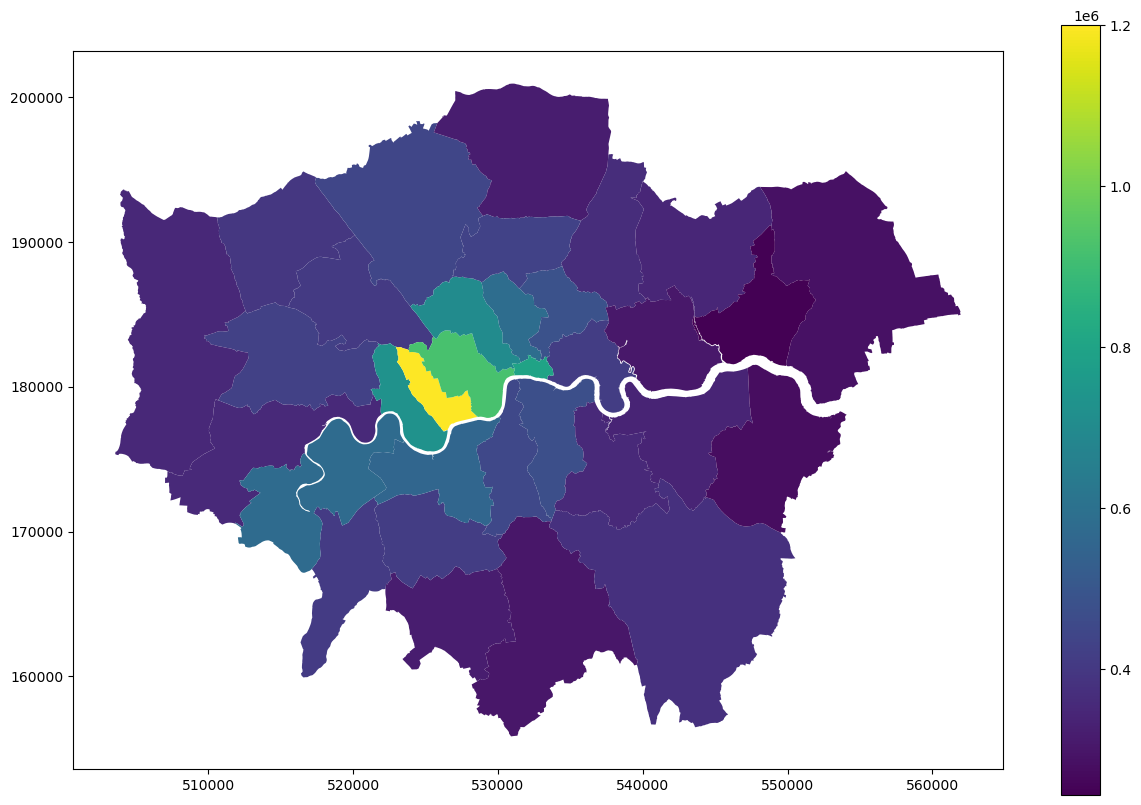

In [30]:
lb = gpd.read_file('london_boroughs.geojson')
lb_map =lb.merge(profiles)
lb_map.plot(column='HousePrice',legend=True)

In [31]:
lb_map.iloc[1:5]

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Code,NewCode,...,BornAbroad,Unemp,Disabled,Degrees,MedInc,CrimeRate,HousePrice,GreenSpace,CarsHH,NonEng
1,Croydon,E09000008,8649.441,0.000,F,None,None,"MULTIPOLYGON (((535007.659 159511.086, 535003....",E09000008,E09000008,...,29.4,4.1,17.5,40.6,37000,77.0,300000,37.1,1.0,36.7
2,Bromley,E09000006,15013.487,0.000,F,None,None,"MULTIPOLYGON (((540371.955 157536.846, 540359....",E09000006,E09000006,...,18.3,5.3,15.9,46.7,43060,64.1,374975,57.8,1.2,38.9
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"MULTIPOLYGON (((521974.460 178105.954, 521966....",E09000018,E09000018,...,46.3,4.3,17.6,45.5,35330,79.2,355000,39.6,1.0,50.6
4,Ealing,E09000009,5554.428,0.000,F,None,None,"MULTIPOLYGON (((510252.384 182887.413, 510248....",E09000009,E09000009,...,47.4,5.8,15.2,49.7,36070,75.5,430000,30.9,0.9,43.6


# Calculate DISTANCE to school
set distance from all houses to all school = 0

calculate distance for a school to a list of houses
add this to the distance 
move to next school and calc distance to list of houses
add these new distances to the total distance
repeat

school_test has total of 4131 schools
hp has a total of 1405 houses

Thus total run time of loop is 4131 * 1405 = 5804055

In [33]:
import math # for sqrt function

import time
t0 = time.time()

school_test = school_location_GDF#[1:100]
house_test = hp#[0:1000]

house_test['distance'] = 0

for school_index, school_row in school_test.iterrows():
    x1 = school_row['EASTING']
    y1 = school_row['NORTHING']
    
    for house_index, house_row in house_test.iterrows():
        x2 = house_row['east']
        y2 = house_row['north']
        
        dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        house_test.loc[house_index,'distance'] += dist
        #house_test.loc[house_index,'distance'] = min(dist, house_test.loc[house_index, 'distance'])

t1 = time.time()

total = t1-t0
print(f"took {total} seconds")

took 968.7483758926392 seconds


In [103]:
house_test.iloc[0:30]

,ID,east,north,price,fl_area,distance,dist_scaled
0,1.0,523800.0,179700.0,107000.0,50.0,6.480526e+07,64805.263504
1,2.0,533200.0,170900.0,55500.0,66.0,7.164454e+07,71644.538476
2,3.0,514600.0,175800.0,103000.0,90.0,8.606491e+07,86064.912823
3,4.0,516000.0,171000.0,187000.0,125.0,8.859146e+07,88591.455512
4,5.0,533700.0,169200.0,43000.0,50.0,7.553281e+07,75532.812742
5,6.0,547900.0,189600.0,69995.0,95.0,9.816299e+07,98162.994572
6,7.0,531900.0,189900.0,80000.0,79.0,7.107286e+07,71072.862509
7,8.0,514600.0,190300.0,57500.0,44.0,9.315655e+07,93156.551490
8,9.0,525700.0,172900.0,104000.0,68.0,6.894200e+07,68942.002455
9,10.0,536700.0,188100.0,69000.0,87.0,7.163862e+07,71638.615535


# K NEAREST NEIGHBOURS

* hp is house price data - has (east, north, price)
* school_location_GDF is school location - has (NORTHING, EASTING)

In [100]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()

In [104]:
house_test['dist_scaled'] = house_test['distance']/1000.0

In [105]:
x_scaler.fit(house_test[['dist_scaled']])

StandardScaler()

In [106]:
X = x_scaler.transform(house_test[['dist_scaled']])

In [107]:
from sklearn.neighbors import KNeighborsRegressor as NN

In [116]:
reg_object = NN(n_neighbors=6,weights='uniform',p=2)

In [117]:
price = house_test['price']/1000.0
reg_object.fit(X,price)

KNeighborsRegressor(n_neighbors=6)

In [118]:
predictions = [ [i*100] for i in range(100)]

In [119]:
for p in predictions:
    predicted_price = reg_object.predict(x_scaler.transform([[20000]]))
    print(f"distance = {p} the prediction is {predicted_price}")

distance = [0] the prediction is [170.25]
distance = [100] the prediction is [170.25]
distance = [200] the prediction is [170.25]
distance = [300] the prediction is [170.25]
distance = [400] the prediction is [170.25]
distance = [500] the prediction is [170.25]
distance = [600] the prediction is [170.25]
distance = [700] the prediction is [170.25]
distance = [800] the prediction is [170.25]
distance = [900] the prediction is [170.25]
distance = [1000] the prediction is [170.25]
distance = [1100] the prediction is [170.25]
distance = [1200] the prediction is [170.25]
distance = [1300] the prediction is [170.25]
distance = [1400] the prediction is [170.25]
distance = [1500] the prediction is [170.25]
distance = [1600] the prediction is [170.25]
distance = [1700] the prediction is [170.25]
distance = [1800] the prediction is [170.25]
distance = [1900] the prediction is [170.25]
distance = [2000] the prediction is [170.25]
distance = [2100] the prediction is [170.25]
distance = [2200] the 

C:\Users\conno\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\conno\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\conno\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\conno\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\conno\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\conno\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid f

# Optimised Tuning

In [120]:
from sklearn.metrics import mean_absolute_error, make_scorer
mae = make_scorer(mean_absolute_error, greater_is_better=False) # LOWER MAE IS BETTER

In [129]:
from sklearn.model_selection import GridSearchCV
opt_nn = GridSearchCV(
    estimator = NN(),
    scoring = mae,
    param_grid = {
        'n_neighbors':range(1,35),
        'weights':['uniform','distance'],
        'p':[1,2,3]})

In [130]:
opt_nn.fit(X,price)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 35), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [131]:
for p in predictions:
    predicted_hp = opt_nn.predict(x_scaler.transform([[20000]]))
    print(f"distance = {p} the prediction is {predicted_hp}")

distance = [0] the prediction is [163.14852941]
distance = [100] the prediction is [163.14852941]
distance = [200] the prediction is [163.14852941]
distance = [300] the prediction is [163.14852941]
distance = [400] the prediction is [163.14852941]
distance = [500] the prediction is [163.14852941]
distance = [600] the prediction is [163.14852941]
distance = [700] the prediction is [163.14852941]
distance = [800] the prediction is [163.14852941]
distance = [900] the prediction is [163.14852941]
distance = [1000] the prediction is [163.14852941]
distance = [1100] the prediction is [163.14852941]
distance = [1200] the prediction is [163.14852941]
distance = [1300] the prediction is [163.14852941]
distance = [1400] the prediction is [163.14852941]
distance = [1500] the prediction is [163.14852941]
distance = [1600] the prediction is [163.14852941]
distance = [1700] the prediction is [163.14852941]
distance = [1800] the prediction is [163.14852941]
distance = [1900] the prediction is [163.14

In [132]:
def print_summary(opt_reg_object):
    params = opt_reg_object.best_estimator_.get_params()
    score = - opt_reg_object.best_score_
    print("Nearest neighbours: %8d" % params['n_neighbors'])
    print("Minkowski p       : %8d" % params['p'])
    print("Weighting         : %8s" % params['weights'])
    print("MAE Score         : %8.2f" % score)
    return
print_summary(opt_nn)

Nearest neighbours:       34
Minkowski p       :        1
Weighting         :  uniform
MAE Score         :    51.66


# PIPELINES

In [140]:
from sklearn.pipeline import Pipeline

In [141]:
pipe = Pipeline([('zscores',StandardScaler()), ('NNreg',NN(n_neighbors=34,weights='uniform',p=1))])

In [142]:
pipe.fit(house_test[['distance']],price)

Pipeline(steps=[('zscores', StandardScaler()),
                ('NNreg', KNeighborsRegressor(n_neighbors=34, p=1))])

In [145]:
for p in predictions:
    print(f"distance = {p} the prediction is {pipe.predict([p])}")

distance = [0] the prediction is [163.14852941]
distance = [100] the prediction is [163.14852941]
distance = [200] the prediction is [163.14852941]
distance = [300] the prediction is [163.14852941]
distance = [400] the prediction is [163.14852941]
distance = [500] the prediction is [163.14852941]
distance = [600] the prediction is [163.14852941]
distance = [700] the prediction is [163.14852941]
distance = [800] the prediction is [163.14852941]
distance = [900] the prediction is [163.14852941]
distance = [1000] the prediction is [163.14852941]
distance = [1100] the prediction is [163.14852941]
distance = [1200] the prediction is [163.14852941]
distance = [1300] the prediction is [163.14852941]
distance = [1400] the prediction is [163.14852941]
distance = [1500] the prediction is [163.14852941]
distance = [1600] the prediction is [163.14852941]
distance = [1700] the prediction is [163.14852941]
distance = [1800] the prediction is [163.14852941]
distance = [1900] the prediction is [163.14

# PIPELINE NOTES EXAMPLE

In [158]:
pipe = Pipeline([('zscores',StandardScaler()),('NNreg',NN())])

opt_nn2 = GridSearchCV(
    estimator = pipe,
    scoring = mae,
    param_grid = {
        'NNreg__n_neighbors':range(1,35),
        'NNreg__weights':['uniform','distance'],
        'NNreg__p':[1,2]})

In [159]:
price = hp['price']/1000.0
#reg_object.fit(X,price)

In [160]:
opt_nn2.fit(hp[['east','north','fl_area']],price)

GridSearchCV(estimator=Pipeline(steps=[('zscores', StandardScaler()),
                                       ('NNreg', KNeighborsRegressor())]),
             param_grid={'NNreg__n_neighbors': range(1, 35), 'NNreg__p': [1, 2],
                         'NNreg__weights': ['uniform', 'distance']},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [161]:
print(len(price))

1405


In [162]:
print(opt_nn2.predict([[523800.0,179750.0,55.0]]))

[122.53520623]


In [163]:
def print_summary2(opt_pipe_object):
    params = opt_pipe_object.best_estimator_.get_params()
    score = - opt_pipe_object.best_score_
    print("Nearest neighbours: %8d" % params['NNreg__n_neighbors'])
    print("Minkowski p       : %8d" % params['NNreg__p'])
    print("Weighting         : %8s" % params['NNreg__weights'])
    print("MAE Score         : %8.2f" % score)
    return

In [164]:
print_summary2(opt_nn2)

Nearest neighbours:       16
Minkowski p       :        1
Weighting         : distance
MAE Score         :    26.42


In [ ]:
#hp_pred = opt_nn2.predict(grid_predictor_vars)
#hp_pred

In [166]:
#hp_mesh = hp_pred.reshape(east_mesh.shape)

# VISUALISING PREDICTION

In [168]:
east_mesh, north_mesh = np.meshgrid(np.linspace(505000,555800,100), np.linspace(158400,199900,100))

In [169]:
fl_mesh = np.zeros_like(east_mesh)

In [170]:
fl_mesh[:,:] = np.mean(hp['fl_area'])

In [171]:
print(east_mesh.shape)
print(north_mesh.shape)

(100, 100)
(100, 100)


In [173]:
grid_predictor_vars = np.array([east_mesh.ravel(), north_mesh.ravel(),fl_mesh.ravel()]).T 
grid_predictor_vars

array([[5.05000000e+05, 1.58400000e+05, 9.28782918e+01],
       [5.05513131e+05, 1.58400000e+05, 9.28782918e+01],
       [5.06026263e+05, 1.58400000e+05, 9.28782918e+01],
       ...,
       [5.54773737e+05, 1.99900000e+05, 9.28782918e+01],
       [5.55286869e+05, 1.99900000e+05, 9.28782918e+01],
       [5.55800000e+05, 1.99900000e+05, 9.28782918e+01]])

In [174]:
hp_pred = opt_nn2.predict(grid_predictor_vars)
hp_pred

array([110.3125292 , 110.31600055, 113.3172002 , ...,  84.65273463,
        84.7302298 ,  84.74755273])

In [175]:
hp_mesh = hp_pred.reshape(east_mesh.shape)

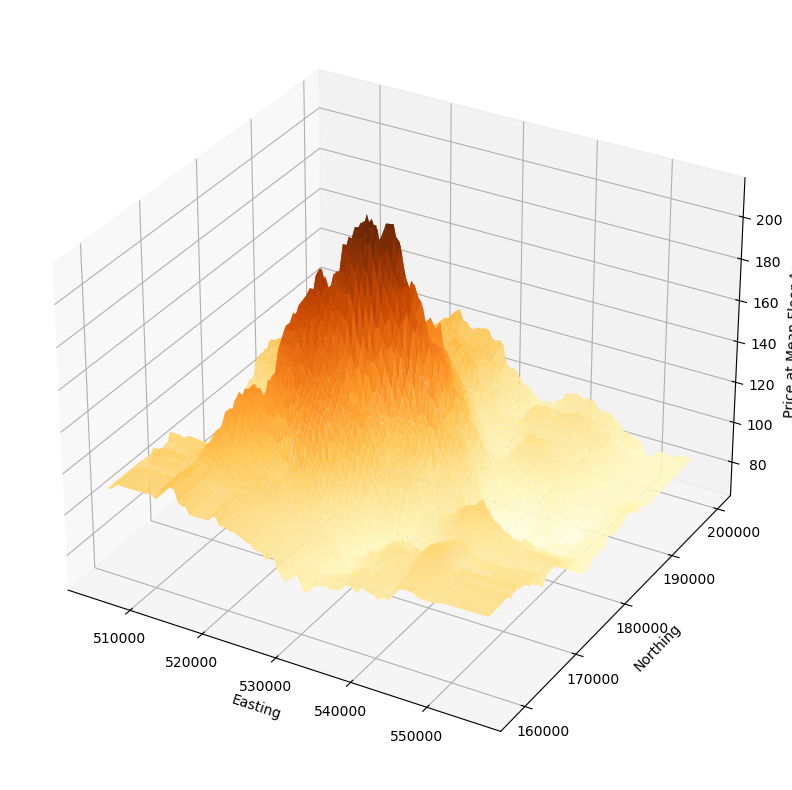

In [176]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(east_mesh, north_mesh, hp_mesh, rstride=1, cstride=1, cmap='YlOrBr',lw=0.01)
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
ax.set_zlabel('Price at Mean Floor Area')
plt.show()

In [177]:
def surf3d(pipe_model,fl_area):
    east_mesh, north_mesh = np.meshgrid(
        np.linspace(505000,555800,100),
        np.linspace(158400,199900,100))
    fl_mesh = np.zeros_like(east_mesh)
    fl_mesh[:,:] = fl_area
    grid_predictor_vars = np.array([east_mesh.ravel(),north_mesh.ravel(),fl_mesh.ravel()]).T
    hp_pred = pipe_model.predict(grid_predictor_vars)
    hp_mesh = hp_pred.reshape(east_mesh.shape)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(east_mesh, north_mesh, hp_mesh, rstride=1, cstride=1, cmap='YlOrBr',lw=0.01)
    ax.set_xlabel('Easting')
    ax.set_ylabel('Northing')
    ax.set_zlabel('Price at Floor Area')
    plt.show()
    return

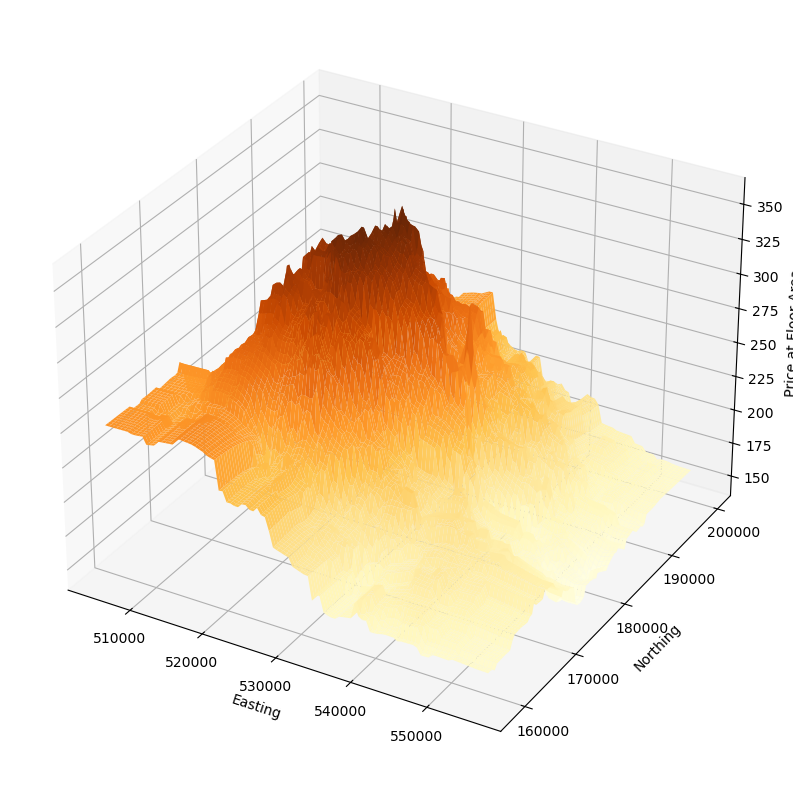

In [178]:
surf3d(opt_nn2,175.0)
plt.savefig('figure175.pdf')
plt.close()

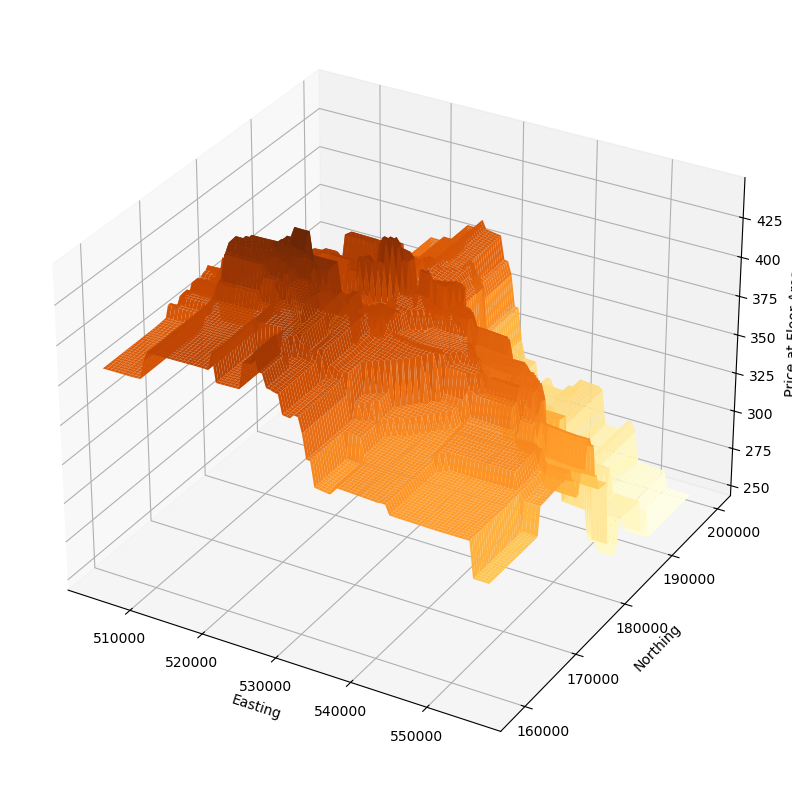

In [179]:
plt.close()
surf3d(opt_nn2,500)
plt.show()

In [ ]:
plt.close()
surf3d(opt_nn2,10)
plt.show()